### Importing Libararies

In [9829]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import missingno
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

### Data

In [9492]:
df=pd.read_csv('lappy2.csv')

In [9493]:
pd.set_option('display.max_columns',None)

In [9494]:
df.head(1)

,Unnamed: 0,index,Covered in Warranty,Warranty Service Type,Processor Variant,Clock Speed,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Not Covered in Warranty,Speakers,Sales Package,Disk Drive,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,Bluetooth,RAM Type,Screen Type,id,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Internal Mic,Wireless LAN,Storage Type,Color,Battery Cell,Type,Keyboard,SSD Capacity,Warranty Summary,Model Name,Part Number,RAM,Graphic Processor,Web Camera,Power Supply,HDMI Port,Dimensions,OS Architecture,Face Recognition,Pointer Device,EMMC Storage Capacity,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Refresh Rate,Battery Backup,Ethernet,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Cache,Number of Cores,Mic In,Additional Features,Memory Slots,RAM Frequency,RJ45,Sound Properties,Lock Port,Security Chip,Chipset,RPM,Multi Card Slot,Hardware Interface,Sound Chip,Included Software,Antivirus,Inbuilt 4G LTE,Stylus Included,NFC Support,Wireless WAN,Laptop Bag,System Architecture,Brightness,RJ11,VGA Port,Color Gamut,TGP,Other Accessories,International Warranty,HDD Capacity,Dock Port,Firewire Port,Read/Write Speed,S-video,Certification,Recovery Options,Optane Memory,Rating,price,Link,Names
0,0,0,Manufacturing Defects,Carry-in,N305,Max Frequency Up to 3.8 GHz,NaN,No,1.43 Kg,NaN,1920 x 1080 Pixel,Physical damage,Yes,"Laptop, Power Adaptor, User Guide, Warranty Do...",Not Available,Processing & Multitasking,No,No,Core i3,v5.2,LPDDR5,Full HD IPS LED-backlit LCD Dislpay,0,NaN,Chromebook Plus Google AI,Chrome,CB514-4H-39T7,35.56 cm (14 Inch),"2 x USB 3.2 Gen 1 Type-A port, 2 x USB 3.2 Gen...",Yes,Intel,Yes,Intel Wireless Wi-Fi 6E AX211,SSD,Steel Gray,3 Cell,Chromebook,Acer FineTip keyboard with international langu...,256 GB,1 Year Carry-in Warranty,Chromebook Plus,NX.KUTSI.002,8 GB,Intel Integrated UHD,"FHD camera, 1920 x 1080 Resolution, 1080p vide...",45 W,NaN,326.87 x 224.93 x 20.5 mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,"₹19,990",https://www.flipkart.com/acer-chromebook-plus-...,Acer Chromebook Plus Google AI Intel Core i3 N...


### Elimanting Duplicates


In [9496]:
df.drop(columns=['Unnamed: 0','index','id','Link'],axis=1,inplace=True) 

In [9497]:
df.duplicated().value_counts() #After dropping Links,index,id

False    548
True     412
Name: count, dtype: int64

In [9498]:
df.drop_duplicates(inplace=True)

#### _Finger Print Sensor_

In [9500]:
df['Finger Print Sensor'].fillna(value='No',inplace=True);

In [9501]:
df['Finger Print Sensor'].unique()
df['Finger Print Sensor'].value_counts()

Finger Print Sensor
No     486
Yes     62
Name: count, dtype: int64

In [9502]:
df['Finger Print Sensor']=pd.get_dummies(df['Finger Print Sensor'],drop_first='No').astype(int)

#### _Face Recognition_

In [9504]:
df['Face Recognition'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [9505]:
df['Face Recognition'].fillna('No',inplace=True)

In [9506]:
df['Face Recognition']=pd.get_dummies(df['Face Recognition'],drop_first='No').astype(int)

### Dropping Columns
#### Unecessary columns 👇

##### Sorting columns having more than 80% NULL cells

In [9509]:
for i in df.columns:
    if round(df[i].isna().sum()/len(df)*100,2)>80:
        print(f'{i} >> {round(df[i].isna().sum()/len(df)*100,2)}')


EMMC Storage Capacity >> 97.99
Refresh Rate >> 88.32
Ethernet >> 88.5
Expandable Memory >> 81.02
Expandable SSD Capacity >> 95.26
Memory Slots >> 86.5
RJ45 >> 82.66
Lock Port >> 95.8
Security Chip >> 88.69
Chipset >> 89.05
RPM >> 92.34
Multi Card Slot >> 84.85
Hardware Interface >> 81.75
Sound Chip >> 92.7
Antivirus >> 96.17
Inbuilt 4G LTE >> 96.35
Stylus Included >> 95.44
NFC Support >> 95.44
Wireless WAN >> 95.26
Laptop Bag >> 89.42
System Architecture >> 81.39
Brightness >> 95.8
RJ11 >> 95.26
VGA Port >> 95.26
Color Gamut >> 97.08
TGP >> 97.63
Other Accessories >> 97.81
International Warranty >> 97.81
HDD Capacity >> 97.08
Dock Port >> 97.63
Firewire Port >> 97.81
Read/Write Speed >> 99.82
S-video >> 98.36
Certification >> 99.09
Recovery Options >> 97.45
Optane Memory >> 99.82


In [9510]:
df.drop(columns=['Refresh Rate','RPM',
'Inbuilt 4G LTE',
'NFC Support',
'Lock Port',
'TGP',
'Antivirus',
'Brightness', 
'EMMC Storage Capacity',
'International Warranty',
'Stylus Included',
'S-video',
'Dock Port',
'Firewire Port',
'RJ11',
'VGA Port',
'Read/Write Speed',
'Color Gamut',
'Recovery Options',
'Certification',
'Optane Memory',
'Refresh Rate',
'Ethernet',
'Laptop Bag',
'Security Chip',
'Sound Chip',
'Sound Properties',
'RJ45',
'Multi Card Slot',
'Memory Slots',
'Hardware Interface',
'Battery Backup',
'Power Supply',
'Mic In',
'Pointer Device',
'Additional Features',
'Battery Cell',
'Cache',
'Internal Mic',
'Keyboard',
'Clock Speed',
'HDMI Port',
'Speakers',
'Wireless LAN',
'Warranty Service Type','Wireless WAN',  
'Not Covered in Warranty'],axis=1,inplace=True)


In [9511]:
df.drop(columns=['Disk Drive','Web Camera','Bluetooth','Sales Package','Color','Part Number'],axis=1,inplace=True)

## Transforming Data 👇

 _We are converting all relevant features in the dataset into numeric formats wherever possible. This transformation is necessary because linear models require numeric input to perform calculations and make predictions. By encoding categorical variables, scaling numerical values, and handling text or datetime features appropriately, we ensure that the data is compatible with linear modeling techniques. This step will help us build a robust and interpretable model._

In [9514]:
df.columns


Index(['Covered in Warranty', 'Processor Variant', 'Finger Print Sensor',
       'MS Office Provided', 'Weight', 'Processor Generation',
       'Screen Resolution', 'Suitable For', 'Backlit Keyboard', 'Touchscreen',
       'Processor Name', 'RAM Type', 'Screen Type', 'Domestic Warranty',
       'Series', 'Operating System', 'Model Number', 'Screen Size', 'USB Port',
       'SSD', 'Processor Brand', 'Storage Type', 'Type', 'SSD Capacity',
       'Warranty Summary', 'Model Name', 'RAM', 'Graphic Processor',
       'Dimensions', 'OS Architecture', 'Face Recognition',
       'Dedicated Graphic Memory Type', 'Dedicated Graphic Memory Capacity',
       'Expandable Memory', 'Expandable SSD Capacity',
       'Supported Operating System', 'Number of Cores', 'RAM Frequency',
       'Chipset', 'Included Software', 'System Architecture',
       'Other Accessories', 'HDD Capacity', 'Rating', 'price', 'Names'],
      dtype='object')

#### *Price*

In [9516]:
df.price.sample()

75    ₹59,990
Name: price, dtype: object

In [9517]:
df['Price']=df.price.apply(lambda x:x.split('₹')[1])
df['Price']=df.Price.apply(lambda x :x.split(',')[0]+x.split(',')[1]  if len(x.split(','))<3 else x.split(',')[0]+x.split(',')[1]+x.split(',')[2])
df.drop(columns=['price'],axis=1,inplace=True)

In [9518]:
df['Price']=df['Price'].astype(int)

In [9519]:
df.Price.sample()

738    64990
Name: Price, dtype: int32

#### *RAM*

In [9521]:
df['RAM (GB)']=df.RAM.apply(lambda x :x.split(' ')[0])
df['RAM (GB)']=df['RAM (GB)'].astype(int)

In [9522]:
df['RAM (GB)'].unique()

array([ 8, 16,  4, 32, 24, 12, 18, 36, 64])

#### *Cores*

In [9524]:
df['Number of Cores'].unique()
df['Number of Cores'].value_counts().sum(),df['Number of Cores'].isna().sum(),len(df)

(194, 354, 548)

In [9525]:
df.loc[df['Number of Cores']==np.nan]

,Covered in Warranty,Processor Variant,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,RAM Type,Screen Type,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Storage Type,Type,SSD Capacity,Warranty Summary,Model Name,RAM,Graphic Processor,Dimensions,OS Architecture,Face Recognition,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Number of Cores,RAM Frequency,Chipset,Included Software,System Architecture,Other Accessories,HDD Capacity,Rating,Names,Price,RAM (GB)


In [9526]:
df['Processor Name'].unique()

array(['Core i3', 'Core i5', 'MT8183', 'Celeron Dual Core', 'Core i9',
       'Snapdragon X Plus', 'Ryzen 3 Quad Core', 'Core Ultra 5',
       'Snapdragon X Elite', 'Ryzen 7 Octa Core', 'Ryzen 5 Hexa Core',
       'Ryzen 5 Quad Core', 'Core i7', 'Athlon Dual Core', 'M3',
       'Ryzen 5 Dual Core', 'M2', 'Core Ultra 7', 'MediaTek MT8788',
       'Core 5', 'Pentium Gold', 'M1', 'Core 7', 'Dual Core',
       'Ryzen 3 Dual Core', 'Core Ultra 9', 'Celeron Quad Core', 'M3 Pro',
       'M3 Max', 'Ryzen AI 9 12 Core', 'M4 Max', 'M4 Pro', 'M4',
       'AMD Ryzen Z1 Extreme', 'Pentium Quad Core'], dtype=object)

In [9527]:
def extract_core(x):
    x = str(x).lower()  
    if 'hexa' in x:
        return 6
    elif 'octa' in x:
        return 8
    elif 'quad' in x:
        return 4
    elif 'dual' in x:
        return 2
    elif 'z1' in x:
        return 10
    elif 'ai 9' in x:
        return 12
    else:
        return 0

In [9528]:
df[df['Processor Brand'] == 'AMD'][['Number of Cores', 'Processor Name']]
df['New_core'] = df['Processor Name'].apply(extract_core)


In [9529]:
df['New_core'].value_counts()

New_core
0     378
4      50
2      44
6      41
8      33
12      1
10      1
Name: count, dtype: int64

In [9530]:
df[(~(df['New_core']==df['Number of Cores'])) &(df['New_core']!=0)][['Number of Cores','New_core']]

,Number of Cores,New_core
5,NaN,2
15,NaN,4
18,NaN,4
23,NaN,4
35,NaN,6
...,...,...
895,NaN,8
898,NaN,6
924,NaN,2
925,NaN,2


In [9531]:
cores=df.loc[(~(df['New_core']==df['Number of Cores'])) &(df['New_core']!=0)]['New_core'].values


In [9532]:
df.loc[(df['New_core'] != df['Number of Cores']) & (df['New_core'] != 0), 'Number of Cores'] = cores


In [9533]:
df['Number of Cores'].isna().sum() #replaced sucessfully

259

In [9534]:
core_mean=df['Number of Cores'].median()
df['Number of Cores'].fillna(value=core_mean,inplace=True)

In [9535]:
df['Number of Cores']=df['Number of Cores'].astype(int)

In [9536]:
df.drop(columns=['New_core'],axis=1,inplace=True)

#### _'MS Office Provided'_

In [9538]:
df['MS Office Provided'].value_counts()

MS Office Provided
Yes    296
No     252
Name: count, dtype: int64

##### Filled Yes to Apple products bcoz they got their own 🙃

In [9540]:

df.loc[df['Processor Brand'] == 'Apple', 'MS Office Provided'] = df.loc[df['Processor Brand'] == 'Apple', 'MS Office Provided'].fillna(value='Yes',inplace=True)
df[df['Processor Brand']=='Apple']['MS Office Provided'].fillna(value='Yes',inplace=True);


In [9541]:
df['MS Office Provided'].fillna(value='Yes',inplace=True);

In [9542]:
df['MS Office Provided']=pd.get_dummies(df['MS Office Provided'],drop_first='No').astype(int)

#### _RAM Type_

In [9544]:
len(df['RAM Type'].unique())

7

In [9545]:
Ranking=[['DDR4','LPDDR4','LPDDR4X','DDR5','LPDDR5', 'LPDDR5X','Unified Memory']]
len(Ranking ) 

1

In [9546]:
df['RAM Type Rank']=OrdinalEncoder(categories=Ranking).fit_transform(df[['RAM Type']]).astype(int)

#### _Backlit Keyboard_

In [9548]:
df['Backlit Keyboard'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9549]:
df['Backlit Keyboard'].fillna(value='No',inplace=True)

In [9550]:
df['Backlit Keyboard']=pd.get_dummies(df['Backlit Keyboard'],drop_first='No').astype(int)

In [9551]:
df['Backlit Keyboard'].unique()

array([0, 1])

#### _Touchscreen'_

In [9553]:
df['Touchscreen']=pd.get_dummies(df['Touchscreen'],drop_first='No').astype(int)

#### _Domestic Warranty_

In [9555]:
df['Domestic Warranty'].fillna(value='0',inplace=True)
df['Domestic Warranty'].replace(['12 Months'],['1 Year'],inplace=True)

In [9556]:
df['Domestic Warranty_in_year']=df['Domestic Warranty'].apply(lambda x:x.split(' ')[0]).astype(int)

In [9557]:
len(df[df['Domestic Warranty_in_year']==0])

291

#### _SSD_

In [9559]:
df['SSD Capacity'].unique()

array(['256 GB', '512 GB', nan, '1 TB', '2 TB', '128 GB'], dtype=object)

In [9560]:
df['SSD Capacity'].replace(['1 TB','2 TB',np.nan],['1000 GB','2000 GB','0 GB'],inplace=True)

In [9561]:
df['SSD (GB)']=df['SSD Capacity'].astype(str).apply(lambda x : x.split(' ')[0]).astype(int)

#### _HDD_

In [9563]:
df['HDD Capacity'].unique()

array([nan, '1 TB', '500 GB'], dtype=object)

In [9564]:
df['HDD Capacity'].replace(['1 TB',np.nan],['1000 GB','0 GB'],inplace=True)

In [9565]:
df['HDD (GB)']=df['HDD Capacity'].astype(str).apply(lambda x : x.split(' ')[0]).astype(int)

#### _Expandable Memory_

In [9567]:
df['Expandable Memory'].value_counts()

Expandable Memory
16 GB                                        21
32 GB                                        12
32                                           11
16                                            8
Upto 16 GB                                    7
Upto 32 GB                                    6
64 GB                                         6
Upto 64 GB                                    5
16GB                                          4
8                                             4
8 GB                                          3
Upto 12 GB                                    2
32GB                                          2
1tb                                           1
Upto 1 TB                                     1
Yes                                           1
12                                            1
Upto 24 GB                                    1
up to 512 GB                                  1
Non Upgradable                                1
No                    

In [9568]:
df[df['Expandable Memory']=='Yes']['Names']

165    HP 15s AMD Ryzen 3 Quad Core 5300U - (8 GB/512...
Name: Names, dtype: object

In [9569]:
df['Expandable Memory'].replace(['Non Upgradable','No','Yes','Upto 1 TB','1tb'],['0 GB','0 GB','8 GB','1000 GB','1000 GB'],inplace=True)

In [9570]:
x=df['Expandable Memory'].astype(str).apply(lambda x: (''.join(i  if i.isdigit() else ' ' for i in x).split()))

In [9571]:
df['Expandable Memory (GB)']=[i[0] if len(i)>=1 else np.nan for i in x]

In [9572]:
df['Expandable Memory (GB)'].fillna(value=0,inplace=True)

In [9573]:
df['Expandable Memory (GB)']=df['Expandable Memory (GB)'].astype(int)

In [9574]:
df['Expandable Memory (GB)'].value_counts()

Expandable Memory (GB)
0       446
16       40
32       31
64       13
8         8
12        3
1000      2
40        2
24        1
512       1
128       1
Name: count, dtype: int64

#### _BRAND NAMES_

In [9576]:
df['Names'].apply(lambda x:x.split(' ')[0]).value_counts()

Names
HP           116
Lenovo       106
ASUS          91
Acer          70
MSI           48
DELL          41
Apple         23
Infinix       13
MICROSOFT     10
SAMSUNG        8
CHUWI          4
Colorful       3
Ultimus        3
Thomson        2
ZEBRONICS      2
WINGS          2
Avita          2
GIGABYTE       1
Primebook      1
FUTOPIA        1
AXL            1
Name: count, dtype: int64

In [9577]:
df['BRAND']=df['Names'].apply(lambda x:x.split(' ')[0])

##### Brands that have less products/Laptops are considered under "Others"

In [9579]:
other=df.groupby(['BRAND']).agg(count=('BRAND','count')).sort_values(by='count',ascending=True).reset_index().head(11)
other=list(other.BRAND)


In [9580]:
df['Brand_Names'] = df['Names'].apply(lambda x: 'others' if x.split(' ')[0] in other else x.split(' ')[0])


In [9581]:
df['Brand_Names'].unique()

array(['Acer', 'HP', 'MSI', 'Lenovo', 'ASUS', 'others', 'DELL',
       'MICROSOFT', 'Infinix', 'Apple', 'SAMSUNG'], dtype=object)

In [9582]:
# pd.get_dummies(df['BRAND']).astype(int)
dummies = pd.get_dummies(df['Brand_Names']).astype(int)
df = df.join(dummies)


#### _'Screen Size_

In [9584]:
df['Screen Size (mm)']=df['Screen Size'].apply(lambda x :x.split(' ')[0]).astype(float)

In [9585]:
df['Screen Size (mm)'].sample()

391    35.81
Name: Screen Size (mm), dtype: float64

#### _Storage_

In [9587]:
Storage=pd.get_dummies(df['Storage Type'],prefix='drive').astype(int)

In [9588]:
df=df.join(Storage)

#### _Processor Generation_

In [9590]:
pg=df['Processor Generation'].astype(str).apply(lambda x : ''.join(i if i.isdigit() else ' ' for i in x).split())

In [9591]:
df['Processor Generation_intel']=[i[0] if len(i)>=1 else 0 for i in pg]

In [9592]:
df['Processor Generation_intel']=df['Processor Generation_intel'].astype(int)

In [9593]:
df['Processor Generation_intel']

0       0
1      12
2       0
3      12
4      12
       ..
950    12
951    12
955    12
958     0
959    13
Name: Processor Generation_intel, Length: 548, dtype: int32

#### _Dedicated Graphic Memory Capacity_

In [9595]:
df[df['Dedicated Graphic Memory Capacity']=='12 GB']['BRAND']

901    MSI
Name: BRAND, dtype: object

In [9596]:
df['Dedicated Graphic Memory Capacity'].unique()

array([nan, '4 GB', '8 GB', '6 GB', '1 GB', '2 GB', '512 MB', '128 MB',
       '12 GB'], dtype=object)

In [9597]:
df['Dedicated Graphic Memory Capacity'].replace(['512 MB', '128 MB',np.nan],['0.512 GB','0.128 GB','0 GB'],inplace=True)

In [9598]:
df['Dedicated Graphic Memory Capacity (GB)']=df['Dedicated Graphic Memory Capacity'].apply(lambda x : x.split(' ')[0]).astype(float)

#### _Processor Brand_

In [9600]:
Processor=pd.get_dummies(df['Processor Brand'],prefix='Processor').astype(int)

In [9601]:
df['Processor Brand'].value_counts()

Processor Brand
Intel       372
AMD         142
Apple        23
Qualcomm      9
MediaTek      2
Name: count, dtype: int64

In [9602]:
df=df.join(Processor)


#### _Apple chip_

In [9604]:
df[df['Processor Brand']=='Apple']['Processor Name'].unique()

array(['M3', 'M2', 'M1', 'M3 Pro', 'M3 Max', 'M4 Max', 'M4 Pro', 'M4'],
      dtype=object)

In [9605]:
def extractt(x):
    number=''.join(i if i.isdigit() else ' ' for i in x)
    sep=number.split()
    if len(sep)>=2:
        return sep[0]+'.'+sep[1]

    else:
        return sep[0]

In [9606]:
df[df['Processor Brand']=='Apple']['Processor Name'].replace(['M3 Pro','M3 Max','M4 Pro','M4 Max'],['3.5','3.75','4.5','4.75']).apply(extractt).astype(float)

118    3.00
161    2.00
358    1.00
565    3.00
568    3.50
575    3.00
578    3.50
591    3.00
638    3.00
644    3.00
651    3.75
654    3.75
661    3.50
674    3.50
681    3.75
725    4.75
729    4.50
731    3.00
744    4.00
768    4.00
774    3.00
781    3.00
935    3.00
Name: Processor Name, dtype: float64

In [9607]:
df['Apple_chips']=df[df['Processor Brand']=='Apple']['Processor Name'].replace(['M3 Pro','M3 Max','M4 Pro','M4 Max'],['3.5','3.75','4.5','4.75']).apply(extractt).astype(float)

In [9608]:
df['Apple_chips'].fillna(value=0,inplace=True)

#### _Variant processor_

In [9610]:
c=df['Processor Variant'].astype(str).apply(lambda x : ''.join(i if i.isalpha() else ' ' for i in x).split())

In [9611]:
c.value_counts()

Processor Variant
[U]                                                                       215
[H]                                                                       125
[nan]                                                                      63
[G]                                                                        37
[N]                                                                        30
[HX]                                                                       22
[HS]                                                                       19
[P]                                                                         8
[AMD, R, U]                                                                 4
[AMD, R, H]                                                                 3
[u]                                                                         2
[AMD, Ryzen, U]                                                             2
[p]                                           

In [9612]:
# H-series is for HIGH performance, U-series is Balanced & N-series is Entry level
def extract_variant(x):
    x = str(x)
    if 'U' in x:
        return 2
    elif 'H'in x:
        return 3
    elif 'N' in x:
        return 1
    else:
        return 0

In [9613]:
c.apply(extract_variant).value_counts()

Processor Variant
2    229
3    169
0    119
1     31
Name: count, dtype: int64

In [9614]:
df['Processor_variant_new']=c.apply(extract_variant)

#### _Expandable SSD Capacity_

In [9616]:
df['Expandable SSD Capacity'].fillna(value='0 GB',inplace=True)
df['Expandable SSD Capacity (GB)']=df['Expandable SSD Capacity'].astype(str).apply(lambda x: x.split(' ')[0]).replace(['1','2','4','6'],['1000','2000','4000','6000'])

In [9617]:
df['Expandable SSD Capacity (GB)']=df['Expandable SSD Capacity (GB)'].astype(int)

#### _Graphic Processor Companies_

In [9619]:
Graphic_card=pd.get_dummies(df['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0]),drop_first='NA',prefix='Graphic').astype(int)

In [9620]:
df=df.join(Graphic_card)

In [9621]:
df.sample()

,Covered in Warranty,Processor Variant,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,RAM Type,Screen Type,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Storage Type,Type,SSD Capacity,Warranty Summary,Model Name,RAM,Graphic Processor,Dimensions,OS Architecture,Face Recognition,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Number of Cores,RAM Frequency,Chipset,Included Software,System Architecture,Other Accessories,HDD Capacity,Rating,Names,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),BRAND,Brand_Names,ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (mm),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),Graphic_Intel,Graphic_MediaTek,Graphic_NA,Graphic_NVIDIA,Graphic_Qualcomm,Graphic_nan
949,Manufacturing Defects,AMD R7-5800H,0,1,2.32 Kg,NaN,1920 x 1080 Pixels,Gaming,1,0,Ryzen 7 Octa Core,DDR4,"FHD, IPS, micro-edge, anti-glare, Low Blue Lig...",1 Year,OMEN,Windows 11 Home,16-C0138AX,40.89 cm (16.1 Inch),1 x SuperSpeed USB Type-C 10Gbps signaling rat...,Yes,AMD,SSD,Gaming Laptop,512 GB,1 Year Onsite Warranty,16-C0138AX,16 GB,NVIDIA GeForce RTX 3050Ti,369 x 245 x 22.5 mm,64 bit,0,GDDR6,4 GB,32,0 GB,Windows 11 Home,8,3200 MHz,NaN,NaN,64,NaN,0 GB,4.3,HP OMEN AMD Ryzen 7 Octa Core AMD R7-5800H - (...,96100,16,0,1,512,0,32,HP,HP,0,0,0,0,1,0,0,0,0,0,0,40.89,0,0,1,0,0,4.0,1,0,0,0,0,0.0,3,0,0,0,0,1,0,0


#### _Gaming_

In [9623]:
def extract_gaming(x):
    x=str(x).lower()
    if 'gaming' in x:
        return 1
    else:
        return 0
    

In [9624]:
df['Gaming']=df['Type'].apply(extract_gaming)

#### _Pixel_

In [9626]:
df['Screen Resolution'].value_counts().head()

Screen Resolution
1920 x 1080 Pixel     218
1920 x 1080 Pixels     54
1920 x 1200 Pixel      46
1920 x 1080 pixel      43
1920 X 1080 Pixel      30
Name: count, dtype: int64

In [9627]:
df['Screen_res (pixel)']=df['Screen Resolution'].apply(lambda x:''.join(i if i.isdigit() else ' ' for i in x).split())
df['Screen_res (pixel)']=df['Screen_res (pixel)'].apply(lambda x: list(x))


In [9628]:
df['Screen_res (pixel)']=df['Screen_res (pixel)'].apply(lambda x:int(x[1])*int(x[0]) if len(x)>=2 else int(x[0])*int(x[0])).astype(int)

In [9629]:
df['Screen_res (pixel)'].value_counts().head()

Screen_res (pixel)
2073600    365
2304000     59
1049088     44
5184000     14
4096000     12
Name: count, dtype: int64

# PRICE PREDICTION MODEL 

## Linear Regression 📈

#### _Numberic Columns_

In [9633]:
df.select_dtypes(include=['number'])

,Finger Print Sensor,MS Office Provided,Backlit Keyboard,Touchscreen,Face Recognition,Number of Cores,Rating,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (mm),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),Graphic_Intel,Graphic_MediaTek,Graphic_NA,Graphic_NVIDIA,Graphic_Qualcomm,Graphic_nan,Gaming,Screen_res (pixel)
0,0,0,0,0,0,6,3.8,19990,8,4,0,256,0,0,0,1,0,0,0,0,0,0,0,0,0,35.56,0,0,1,0,0,0.0,0,0,1,0,0,0.0,1,0,1,0,0,0,0,0,0,2073600
1,0,0,1,0,0,6,4.1,44990,16,0,0,512,0,0,0,1,0,0,0,0,0,0,0,0,0,35.56,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,0,2073600
2,0,0,0,1,0,6,3.3,11988,4,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,29.46,0,0,0,1,0,0.0,0,0,0,1,0,0.0,0,0,0,1,0,0,0,0,0,1049088
3,0,0,0,0,0,6,4.3,51990,16,0,0,512,0,0,0,0,0,0,0,0,0,0,1,0,0,39.62,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,0,1,0,0,1,2073600
4,0,1,0,0,0,6,4.2,37990,8,0,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,39.62,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,0,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0,1,1,0,0,10,NaN,79099,8,0,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,39.62,0,0,1,0,12,4.0,0,0,1,0,0,0.0,0,0,0,0,0,1,0,0,1,2073600
951,0,1,1,0,0,6,4.2,69990,16,0,0,512,0,0,1,0,0,0,0,0,0,0,0,0,0,40.64,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,0,1,0,0,1,2304000
955,1,1,1,0,0,10,4.4,59990,16,2,1,512,0,0,0,0,0,0,0,0,0,0,0,1,0,39.62,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,0,2073600
958,0,1,0,0,0,2,4.3,36990,8,0,1,256,1000,16,0,0,0,0,1,0,0,0,0,0,0,39.62,0,1,0,0,0,0.0,1,0,0,0,0,0.0,2,0,0,0,0,0,0,0,0,2073600


### _DATA_

In [9635]:
df2=df.select_dtypes(include=['number'])#As we are applying Linear REgression only Numberic columns are included

In [9636]:
df2['Rating'].fillna(value=df2.Rating.mean(),inplace=True)#Imputing NULL ratings with mean ratings


In [9637]:
df2.drop(columns=['Graphic_NA','Domestic Warranty_in_year'],axis=1,inplace=True)#were affecting are model😅

#### _Spilliting_

##### _Label / Response_ (Y)

In [9640]:
y=df2.loc[:,['Price']] 

##### _Features_ (X)

In [9642]:
x=df2.drop(columns=['Price'],axis=1)


In [9643]:
x

,Finger Print Sensor,MS Office Provided,Backlit Keyboard,Touchscreen,Face Recognition,Number of Cores,Rating,RAM (GB),RAM Type Rank,SSD (GB),HDD (GB),Expandable Memory (GB),ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (mm),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),Graphic_Intel,Graphic_MediaTek,Graphic_NVIDIA,Graphic_Qualcomm,Graphic_nan,Gaming,Screen_res (pixel)
0,0,0,0,0,0,6,3.800000,8,4,256,0,0,0,1,0,0,0,0,0,0,0,0,0,35.56,0,0,1,0,0,0.0,0,0,1,0,0,0.0,1,0,1,0,0,0,0,0,2073600
1,0,0,1,0,0,6,4.100000,16,0,512,0,0,0,1,0,0,0,0,0,0,0,0,0,35.56,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,2073600
2,0,0,0,1,0,6,3.300000,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,29.46,0,0,0,1,0,0.0,0,0,0,1,0,0.0,0,0,0,1,0,0,0,0,1049088
3,0,0,0,0,0,6,4.300000,16,0,512,0,0,0,0,0,0,0,0,0,0,1,0,0,39.62,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,1,0,0,1,2073600
4,0,1,0,0,0,6,4.200000,8,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,39.62,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0,1,1,0,0,10,4.169198,8,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,39.62,0,0,1,0,12,4.0,0,0,1,0,0,0.0,0,0,0,0,1,0,0,1,2073600
951,0,1,1,0,0,6,4.200000,16,0,512,0,0,1,0,0,0,0,0,0,0,0,0,0,40.64,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,1,0,0,1,2304000
955,1,1,1,0,0,10,4.400000,16,2,512,0,0,0,0,0,0,0,0,0,0,0,1,0,39.62,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,1,0,0,0,0,0,2073600
958,0,1,0,0,0,2,4.300000,8,0,256,1000,16,0,0,0,0,1,0,0,0,0,0,0,39.62,0,1,0,0,0,0.0,1,0,0,0,0,0.0,2,0,0,0,0,0,0,0,2073600


In [9644]:
len(x.columns)

45

#### _Train Test split_

In [9646]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


#### _Scalling_

In [9648]:
# scaler=MaxAbsScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

#### _LInear_

In [9650]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9651]:
y_pred=lr.predict(x_test)

Text(0.5, 1.0, 'Prediction Performance')

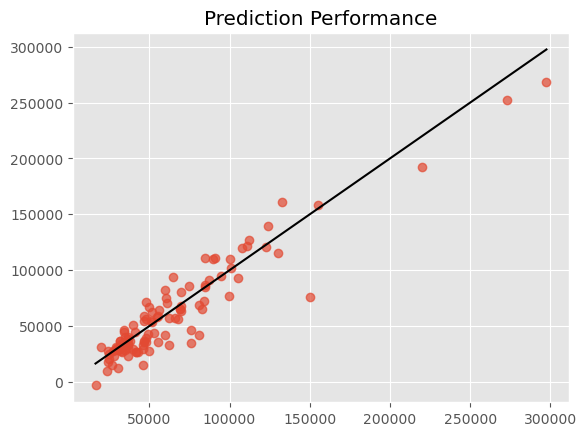

In [9652]:
plt.plot(y_test,y_pred,'o',alpha=0.7)
plt.plot([(y_test.min()),(y_test.max())],[(y_test.min()),(y_test.max())],color='black')
plt.title('Prediction Performance')

## Accuracy 🎯

In [9654]:
print(f' Mean_squared_error >> {mean_squared_error(y_test,y_pred)}\n\n R2_score >> {round(r2_score(y_test,y_pred),2)} \n\n Adjusted_R2_score >> {round(1-((1-r2_score(y_test,y_pred))*len(x_train)-1)/(len(x_train)-len(x.columns)-1),2)}')

 Mean_squared_error >> 241237329.9247492

 R2_score >> 0.88 

 Adjusted_R2_score >> 0.87


#### _Strong Predictive Power_ , _Effective Feature Engineering_
- An R² of 0.88 indicates that our model explains 88% of the variance in the target variable.
This suggests that the model has strong predictive power and is capturing the underlying patterns in the data effectively.

### RESIDUAL PLOT

Text(0.5, 1.0, 'distribution of Residuals')

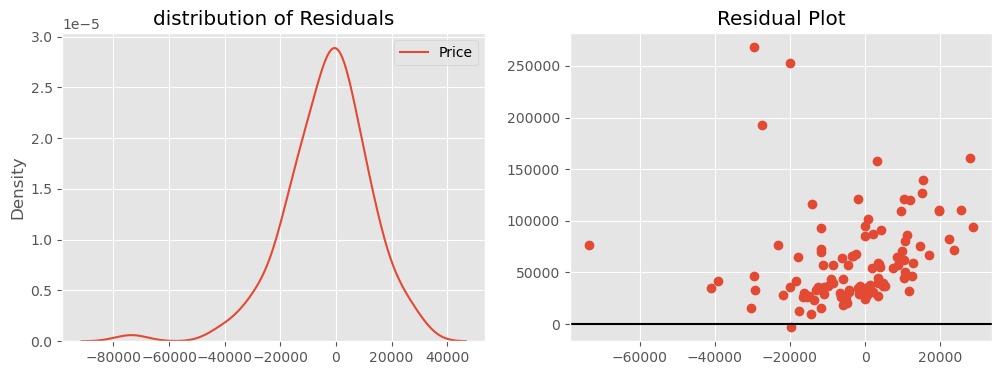

In [9836]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax=ax.flatten()
ax[1].plot(y_pred-y_test,y_pred,'o')
ax[1].axhline(y=0,color='black')
ax[1].set_title("Residual Plot")
sns.kdeplot(y_pred-y_test,ax=ax[0])
ax[0].set_title('distribution of Residuals')
#NO pattern detected

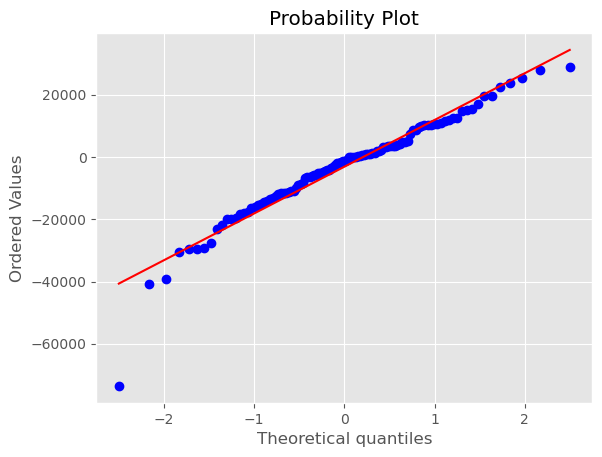

In [9856]:
stats.probplot(np.asarray(res).reshape(110),dist='norm',plot=plt);


### Coefficent values of Features 🔽

In [9658]:
for i in range(0,len(lr.coef_[0])):
    print(f"{x.columns[i]}: {lr.coef_[0][i]}")
    print()

Finger Print Sensor: -951.1763200544021

MS Office Provided: 135.28348919695324

Backlit Keyboard: 3383.1019062842693

Touchscreen: 19938.909012276836

Face Recognition: -19397.31497189729

Number of Cores: -699.284116138093

Rating: 3241.684292059722

RAM (GB): 2726.087573881206

RAM Type Rank: 569.0814677944101

SSD (GB): 39.83074002232245

HDD (GB): 8.71161659594773

Expandable Memory (GB): 10.132388237942015

ASUS: -4758.88190735094

Acer: -9366.353580266272

Apple: -3573.7914252423648

DELL: 2558.552740328365

HP: 2050.6998168177843

Infinix: -8363.247461589128

Lenovo: -2967.0641692378185

MICROSOFT: 26787.72425231753

MSI: -4379.178911138027

SAMSUNG: 8341.13517922293

others: -6329.594535044853

Screen Size (mm): 809.524120896421

drive_HDD: 14630.321201816561

drive_Hybrid: -5112.197076615918

drive_SSD: -10485.992439960304

drive_eMMC: 967.868314759594

Processor Generation_intel: -411.9093593416819

Dedicated Graphic Memory Capacity (GB): 6206.484283823633

Processor_AMD: -3

In [9659]:
df.select_dtypes(include='number').corrwith(df.Price)

Finger Print Sensor                       0.015237
MS Office Provided                        0.113146
Backlit Keyboard                          0.297286
Touchscreen                               0.197142
Face Recognition                          0.017621
Number of Cores                           0.299607
Rating                                    0.395496
Price                                     1.000000
RAM (GB)                                  0.766697
RAM Type Rank                             0.566023
Domestic Warranty_in_year                 0.044794
SSD (GB)                                  0.583948
HDD (GB)                                 -0.057306
Expandable Memory (GB)                   -0.022308
ASUS                                      0.018461
Acer                                     -0.108780
Apple                                     0.504877
DELL                                     -0.068857
HP                                       -0.126486
Infinix                        